<a href="https://colab.research.google.com/github/mehrnazeraeisi/Results-for-KnnRegressor/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه R² و MSE برای تک‌ویژگی‌ها
    def compute_r2_mse_per_feature(X, y):
        scores = []
        for feature in X.columns:
            model = KNeighborsRegressor()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            scores.append((feature, r2, mse))
        df_scores = pd.DataFrame(scores, columns=['Feature', 'R2', 'MSE'])
        return df_scores.sort_values(by='R2', ascending=False).reset_index(drop=True)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_r2 = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsRegressor()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            results.append((k, r2, mse))
            if r2 > best_r2:
                best_r2 = r2
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_r2 = r2_score(y, y_pred)
        all_mse = mean_squared_error(y, y_pred)
        results.append(("All Features", all_r2, all_mse))
        return pd.DataFrame(results, columns=["Group Size", "R2 Score", "MSE"]), best_group

    # اجرای مراحل
    single_feat_df = compute_r2_mse_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج R² و MSE برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی (R² و MSE):")
    print(group_results_df.to_string(index=False))

    best_r2 = group_results_df[group_results_df["Group Size"] == len(best_group)]["R2 Score"].values[0]
    best_mse = group_results_df[group_results_df["Group Size"] == len(best_group)]["MSE"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 R²: {best_r2:.4f}")
    print(f"🔻 MSE: {best_mse:.2f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    r2_scores = {"all_features": [], "best_group": []}
    mse_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsRegressor()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred))

    # رسم نمودار R²
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, r2 in r2_scores.items():
        plt.plot(x, r2, label=f"{name.replace('_', ' ').title()} R²", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("R² Score")
    plt.title("KNN Regressor R² Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # رسم نمودار MSE
    plt.figure(figsize=(8, 4))
    for name, mse in mse_scores.items():
        plt.plot(x, mse, label=f"{name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel("Repeat")
    plt.ylabel("Mean Squared Error")
    plt.title("KNN Regressor MSE Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_r2 = np.mean(r2_scores[name])
        avg_mse = np.mean(mse_scores[name])
        print(f"{name.replace('_', ' ').title()} → R²: {avg_r2:.4f}, MSE: {avg_mse:.2f}")


(20640, 8)
📌 نتایج R² و MSE برای هر ویژگی:
   Feature        R2      MSE
    MedInc  0.576552 0.563843
  AveRooms  0.328928 0.893566
  AveOccup  0.263637 0.980505
 AveBedrms  0.174917 1.098639
Population  0.036269 1.283256
 Longitude  0.012794 1.314514
  HouseAge -0.131907 1.507191
  Latitude -0.135675 1.512209

📊 نتایج عملکرد گروه‌های افزایشی (R² و MSE):
  Group Size  R2 Score      MSE
           1  0.576552 0.563843
           2  0.642580 0.475923
           3  0.718398 0.374968
           4  0.725614 0.365359
           5  0.608051 0.521900
           6  0.586025 0.551229
           7  0.469019 0.707028
           8  0.471119 0.704232
All Features  0.471119 0.704232

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 R²: 0.7256
🔻 MSE: 0.37


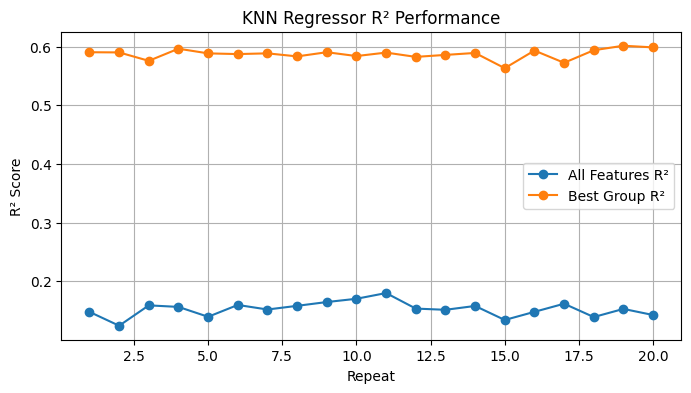

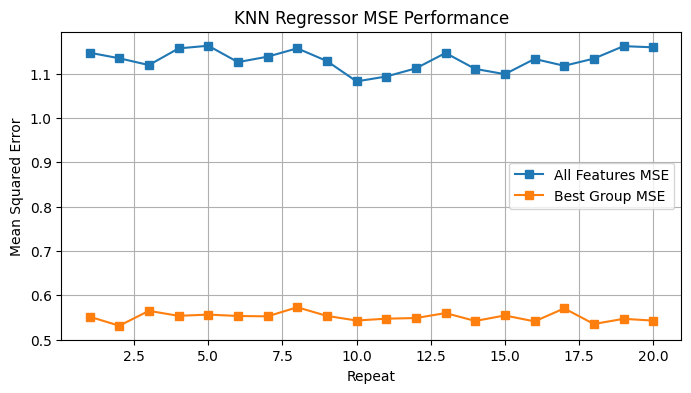


📈 میانگین نتایج پس از تکرار:
All Features → R²: 0.1527, MSE: 1.13
Best Group → R²: 0.5872, MSE: 0.55


In [8]:
from sklearn.datasets import fetch_california_housing


# بارگذاری داده‌های قیمت خانه‌های کالیفرنیا
data =  fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y= data.target

print(X.shape)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# اجرای تابع
evaluate_knn_on_dataset(X, y, test_size=0.2, n_repeats=20)
